In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df1=pd.read_csv('M2SLMoneyStock.csv',index_col='Date',parse_dates=True)

In [5]:
df2=pd.read_csv('PCEPersonalSpending.csv',index_col='Date',parse_dates=True)

In [6]:
df1.index.freq='MS'
df2.index.freq='MS'

In [7]:
from statsmodels.tsa.api import VAR

In [8]:
from statsmodels.tools.eval_measures import rmse

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
df=df1.join(df2)

In [11]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


<AxesSubplot:xlabel='Date'>

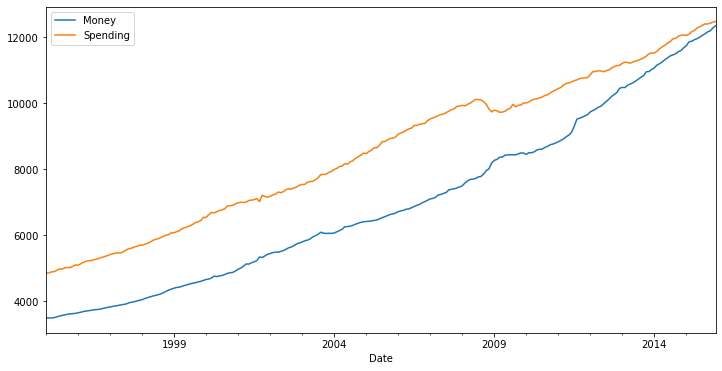

In [12]:
df.plot(figsize=(12,6))

In [13]:
results=adfuller(df['Money'])

In [14]:
results

(4.239022425670649,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

In [15]:
resultr=adfuller(df['Spending'])

In [16]:
resultr

(0.14979608598625438,
 0.9693009944428312,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

In [17]:
df.diff()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
...,...,...
2015-08-01,51.5,38.6
2015-09-01,57.0,-1.2
2015-10-01,33.9,23.3


In [18]:
df_tr=df.diff()

In [19]:
adfuller(df_tr['Money'].dropna())

(-2.0574040497379382,
 0.2619837978511249,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.948346069441)

In [20]:
adfuller(df_tr['Spending'].dropna())

(-7.226973930850651,
 2.0410272592129196e-10,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2328.23145843905)

In [21]:
df_tr=df_tr.diff().dropna()

In [22]:
df_tr

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5


In [23]:
nobs=12

In [24]:
train=df_tr.iloc[:-12]

In [25]:
test=df_tr.iloc[-12:]

In [26]:
len(test)

12

In [27]:
model=VAR(train)

for p in [1,2,3,4,5,6,7,8]:
    results=model.fit(p)
    print('Order',p)
    print('AIC',results.aic)
    print('\n')

Order 1
AIC 14.178610495220896


Order 2
AIC 13.955189367163703


Order 3
AIC 13.849518291541038


Order 4
AIC 13.827950574458283


Order 5
AIC 13.78730034460964


Order 6
AIC 13.799076756885809


Order 7
AIC 13.797638727913972


Order 8
AIC 13.747200843672085




In [28]:
results=model.fit(5)

In [30]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Jul, 2021
Time:                     16:58:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [37]:
z=results.forecast(steps=12,y=cre)

In [35]:
cre=train.values[-5:]

In [36]:
cre

array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [38]:
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [39]:
z=pd.DataFrame(z,columns=['Money','Spending'])

In [40]:
z

,Money,Spending
0,-16.995276,36.149820
1,-3.174038,-11.450298
2,-0.377725,-6.684969
3,-2.602233,5.479458
4,4.228557,-2.443365
5,1.559393,0.387639
6,-0.998410,3.883680
7,0.364510,-2.356101
8,-1.210627,-1.224147
9,0.225877,0.786927


In [44]:
z.set_index(pd.date_range('2015-01-01',periods=12,freq='MS'),inplace=True)

In [46]:
z.index.name='Date'

In [47]:
z

,Money,Spending
Date,,
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147


In [49]:
df.iloc[-12-1]-df.iloc[-12-2]+

Money       78.6
Spending    10.6
dtype: float64

In [50]:
z.columns=['Money_2d','Spending_2d']

In [51]:
z

,Money_2d,Spending_2d
Date,,
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147


In [52]:
z['Money_1d']=(df['Money'].iloc[-12-1]-df['Money'].iloc[-12-2])+(z['Money_2d'].cumsum())

In [55]:
z['Money']=df['Money'].iloc[-12-1]+z['Money_1d'].cumsum()

In [56]:
z

,Money_2d,Spending_2d,Money_1d,Money
Date,,,,
2015-01-01,-16.995276,36.149820,61.604724,11731.704724
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371
2015-04-01,-2.602233,5.479458,55.450728,11903.639099
2015-05-01,4.228557,-2.443365,59.679285,11963.318384
2015-06-01,1.559393,0.387639,61.238678,12024.557062
2015-07-01,-0.998410,3.883680,60.240268,12084.797331
2015-08-01,0.364510,-2.356101,60.604779,12145.402109
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261


In [57]:
z['Spending_1d']=(df['Spending'].iloc[-12-1]-df['Spending'].iloc[-12-2])+(z['Spending_2d'].cumsum())
z['Spending']=df['Spending'].iloc[-12-1]+z['Spending_1d'].cumsum()

In [58]:
z

,Money_2d,Spending_2d,Money_1d,Money,Spending_1d,Spending
Date,,,,,,
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375


<AxesSubplot:xlabel='Date'>

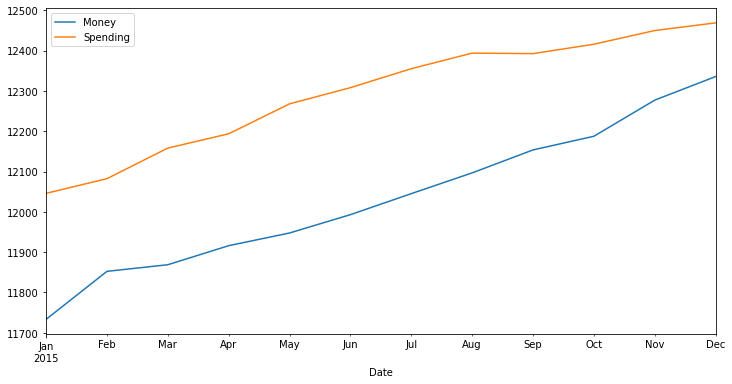

In [60]:
df[-12:].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

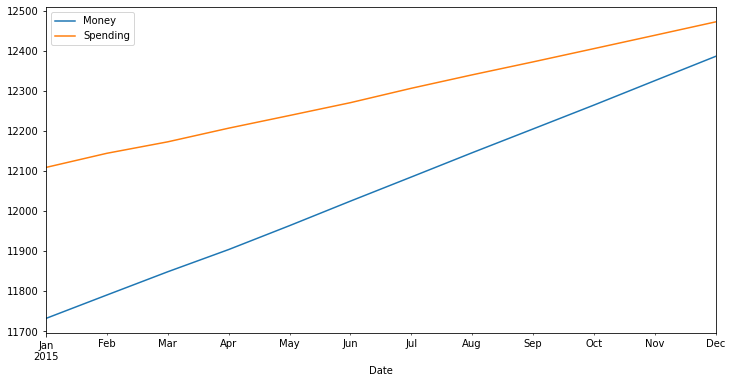

In [67]:
z[['Money','Spending']].plot(figsize=(12,6))

In [76]:
test_range=df.iloc[-12:]

In [77]:
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


<AxesSubplot:xlabel='Date'>

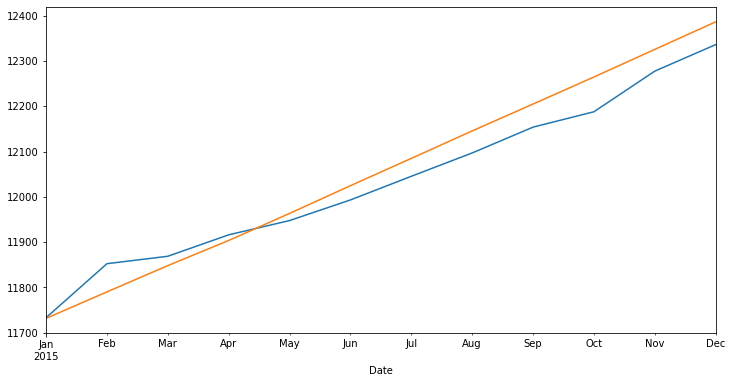

In [78]:
test_range['Money'].plot(figsize=(12,6))
z['Money'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

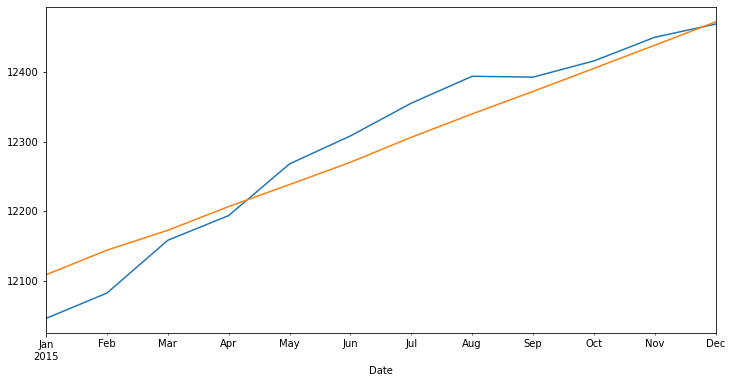

In [79]:
test_range['Spending'].plot(figsize=(12,6))
z['Spending'].plot(figsize=(12,6))

In [80]:
rmse(z['Money'],test_range['Money'])

43.71049653558893

In [81]:
test_range['Money'].mean()

12034.008333333333

In [82]:
rmse(z['Spending'],test_range['Spending'])

37.001175169408036

In [83]:
test_range['Spending'].mean()

12294.533333333333